In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
data = pd.read_csv('Dataset.csv')
A = data.loc[501:1001,["q4_12_heavy", "Instant_Liking", "q1_1_personal_opinion_of_this_Deodorant", "q3_1_strength_of_the_Deodorant"]]
B = data.loc[:501,["q4_12_heavy", "Instant_Liking", "q1_1_personal_opinion_of_this_Deodorant", "q3_1_strength_of_the_Deodorant"]]

In [3]:
A['type'] = 1
B['type'] = 0
typy = A.append(B, ignore_index=True)

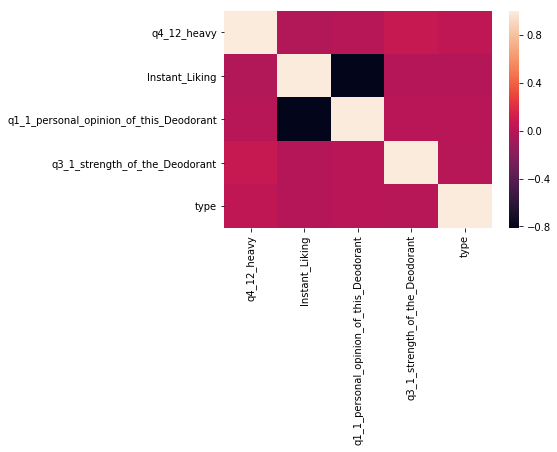

In [4]:
corr = typy.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [5]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# určenie dát . stlpce "Instant_Liking" "q1_1_personal_opinion_of_this_Deodorant"
X=typy.ix[:,1:2]

# Specify the target labels and flatten the array
y= np.ravel(typy.type)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [6]:

# konstruktor
model = Sequential()

# vstupná vrstva
model.add(Dense(12, activation='relu', input_shape=(1,)))

# skrytá vrstva 
model.add(Dense(20, activation='relu'))

model.add(Dense(4, activation='relu'))


# výstupná vrstva
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=25, batch_size=2, verbose=1)

scores = model.evaluate(X_test,y_test)

print("\nAccuracy: %.2f%%" % (scores[1]*100))

Epoch 1/25
802/802 [==============================] - 2s 3ms/step - loss: 0.6933 - acc: 0.4800
Epoch 2/25
802/802 [==============================] - 2s 2ms/step - loss: 0.6932 - acc: 0.4576
Epoch 3/25
802/802 [==============================] - 1s 2ms/step - loss: 0.6933 - acc: 0.4925
Epoch 4/25
802/802 [==============================] - 1s 2ms/step - loss: 0.6933 - acc: 0.4950
Epoch 5/25
802/802 [==============================] - 1s 1ms/step - loss: 0.6933 - acc: 0.4701
Epoch 6/25
802/802 [==============================] - 1s 1ms/step - loss: 0.6933 - acc: 0.4426
Epoch 7/25
802/802 [==============================] - 1s 1ms/step - loss: 0.6933 - acc: 0.4751
Epoch 8/25
802/802 [==============================] - 1s 1ms/step - loss: 0.6933 - acc: 0.4825
Epoch 9/25
802/802 [==============================] - 2s 2ms/step - loss: 0.6933 - acc: 0.4726
Epoch 10/25
802/802 [==============================] - 1s 2ms/step - loss: 0.6933 - acc: 0.4651
Epoch 11/25
802/802 [============================

In [8]:
y_pred = model.predict(X_test)

In [9]:
scores = model.evaluate(X_test,y_test)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

201/201 [==============================] - 0s 75us/step

Accuracy: 50.25%


In [10]:
y_pred = model.predict(X_test)

In [11]:
y_pred[:10]

array([[0.4997627],
       [0.4997627],
       [0.4997627],
       [0.4997627],
       [0.4997627],
       [0.4997627],
       [0.4997627],
       [0.4997627],
       [0.4997627],
       [0.4997627]], dtype=float32)

In [12]:
y_test[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1])